In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (10.0, 6.0)

# Sympy
![sympy](http://www.sympy.org/static/images/logo.png)

The function init_printing() will enable LaTeX pretty printing in the notebook for SymPy expressions.

In [2]:
import sympy as sym
from sympy import symbols, Symbol
sym.init_printing()

In [3]:
x= Symbol('x')
(sym.pi + x)**2

In [4]:
alpha1, omega_2 = symbols('alpha1 omega_2')
alpha1, omega_2

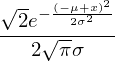

In [5]:
mu, sigma = sym.symbols('mu sigma', positive = True)
1/sym.sqrt(2*sym.pi*sigma**2)* sym.exp(-(x-mu)**2/(2*sigma**2))

# Why use `sympy`?
- Symbolic derivatives
- Translate mathematics into low level code
- Deal with very large expressions
- Optimize code using mathematics

Dividing two integers in Python creates a float, like 1/2 -> 0.5. If you want a rational number, use Rational(1, 2) or S(1)/2.

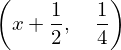

In [6]:
x + sym.S(1)/2 , sym.Rational(1,4)

In [7]:
y = Symbol('y')
x ^ y # XOR operator (True only if x != y)

In [8]:
x**y

SymPy expressions are immutable. Functions that operate on an expression return a new expression.

In [9]:
expr = x + 1
expr

In [10]:
expr.subs(x, 2)

In [11]:
expr

### Exercise: Lagrange polynomial

Given a set of $k + 1$ data points 
:$(x_0, y_0),\ldots,(x_j, y_j),\ldots,(x_k, y_k)$ the Lagrange interpolation polynomial is:

$$
L(x) := \sum_{j=0}^{k} y_j \ell_j(x)
$$
$\ell_j$ are Lagrange basis polynomials:
$$\ell_j(x) := \prod_{\begin{smallmatrix}0\le m\le k\\ m\neq j\end{smallmatrix}} \frac{x-x_m}{x_j-x_m} $$
We can demonstrate that at each point $x_i$, $L(x_i)=y_i$ so $L$ interpolates the function.

- Compute the Lagrange polynomial for points 
$$
(-2,21),(-1,1),(0,-1),(1,-3),(2,1)
$$


## Evaluate an expression

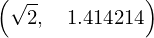

In [12]:
sym.sqrt(2), sym.sqrt(2).evalf(7) # set the precision to 7 digits

In [13]:
from sympy import sin
x = Symbol('x')
expr = sin(x)/x
expr.evalf(subs={x: 3.14})  # substitute the symbol x by Pi value

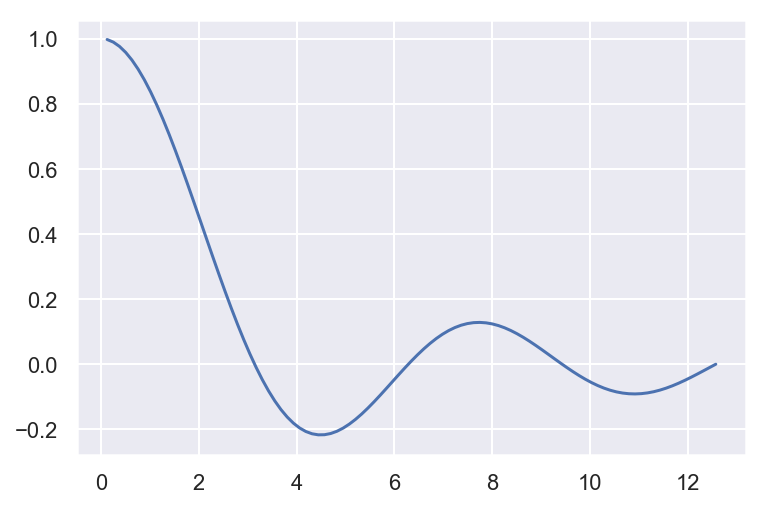

In [14]:
from sympy.utilities.autowrap import ufuncify
f = ufuncify([x], expr, backend='f2py') 

t = np.linspace(0,4*np.pi,100)
plt.plot(t, f(t));

### Exercise

- Plot the Lagrange polynomial computed above and interpolations points with matplotlib

## Undefined functions and derivatives

Undefined functions are created with `Function()`. Undefined are useful to state that one variable depends on another (for the purposes of differentiation).

In [15]:
from sympy import Function
f = Function('f')

In [16]:
f(x) + 1

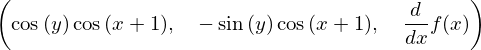

In [17]:
from sympy import diff, sin, cos
diff(sin(x + 1)*cos(y), x), diff(sin(x + 1)*cos(y), x, y), diff(f(x), x)

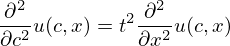

In [18]:
c, t = sym.symbols('t c')
u = sym.Function('u')
sym.Eq(diff(u(t,x),t,t), c**2*diff(u(t,x),x,2))

# Matrices

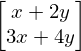

In [19]:
from sympy import Matrix
Matrix([[1, 2], [3, 4]])*Matrix([x, y])

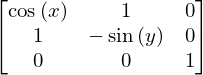

In [20]:
x, y, z = sym.symbols('x y z')
Matrix([sin(x) + y, cos(y) + x, z]).jacobian([x, y, z])

## Matrix symbols

SymPy can also operate on matrices of symbolic dimension ($n \times m$). `MatrixSymbol("M", n, m)` creates a matrix $M$ of shape $n \times m$. 

In [21]:
from sympy import MatrixSymbol, Transpose

n, m = sym.symbols('n m', integer=True)
M = MatrixSymbol("M", n, m)
b = MatrixSymbol("b", m, 1)
Transpose(M*b)

In [22]:
Transpose(M*b).doit()

## Solving systems of equations

`solve` solves equations symbolically (not numerically). The return value is a list of solutions. It automatically assumes that it is equal to 0.

In [23]:
from sympy import Eq, solve
solve(Eq(x**2, 4), x)

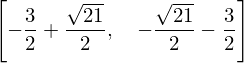

In [24]:
solve(x**2 + 3*x - 3, x)

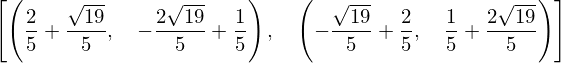

In [25]:
eq1 = x**2 + y**2 - 4  # circle of radius 2
eq2 = 2*x + y - 1  # straight line: y(x) = -2*x + 1
solve([eq1, eq2], [x, y])

## Solving differential equations
`dsolve` can (sometimes) produce an exact symbolic solution. Like `solve`, `dsolve` assumes that expressions are equal to 0. 

In [26]:
from sympy import Function, dsolve
f = Function('f')
dsolve(f(x).diff(x, 2) + f(x))

## Code printers
The most basic form of code generation are the code printers. They convert SymPy expressions into over a dozen target languages.


In [27]:
x = symbols('x')
expr = abs(sin(x**2))
expr

In [28]:
sym.ccode(expr)

'fabs(sin(pow(x, 2)))'

In [29]:
sym.fcode(expr, standard=2003, source_format='free')

'abs(sin(x**2))'

In [30]:
from sympy.printing.cxxcode import cxxcode
cxxcode(expr)

'std::fabs(std::sin(std::pow(x, 2)))'

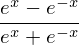

In [31]:
sym.tanh(x).rewrite(sym.exp)

In [32]:
from sympy import sqrt, exp, pi
expr = 1/sqrt(2*pi*sigma**2)* exp(-(x-mu)**2/(2*sigma**2))
print(sym.fcode(expr, standard=2003, source_format='free'))

parameter (pi = 3.1415926535897932d0)
(1.0d0/2.0d0)*sqrt(2.0d0)*exp(-0.5d0*(-mu + x)**2/sigma**2)/(sqrt(pi)* &
      sigma)


## Creating a function from a symbolic expression
In SymPy there is a function to create a Python function which evaluates (usually numerically) an expression. SymPy allows the user to define the signature of this function (which is convenient when working with e.g. a numerical solver in ``scipy``).

In [33]:
from sympy import log
x, y = symbols('x y')
expr = 3*x**2 + log(x**2 + y**2 + 1)
expr

In [34]:
%timeit expr.subs({x: 17, y: 42}).evalf()

235 µs ± 4.24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
import math
f = lambda x, y: 3*x**2 + math.log(x**2 + y**2 + 1)
f(17, 42)

In [36]:
%timeit f(17, 42)

1.06 µs ± 9.63 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Evaluate above expression numerically invoking the subs method followed by the evalf method can be quite slow and cannot be done repeatedly.

In [37]:
from sympy import lambdify
g = lambdify([x, y], expr, modules=['math'])
g(17, 42)

In [38]:
%timeit g(17, 42)

1.06 µs ± 9.19 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [39]:
xarr = np.linspace(17, 18, 5)
h = lambdify([x, y], expr)  # lambdify return a python function
out = h(xarr, 42)
out.shape

In [40]:
z = z1, z2, z3 = symbols('z:3')
expr2 = x*y*(z1 + z2 + z3)
func2 = lambdify([x, y, z], expr2)
func2(1, 2, (3, 4, 5))

Behind the scenes lambdify constructs a string representation of the Python code and uses Python's eval function to compile the function.

### SIR model 

$$
\begin{eqnarray}
\frac{dS(t)}{dt} &=& - \beta  S(t) I(t) \\
\frac{dI(t)}{dt} &=& \beta  S(t) I(t) -  \gamma I(t) \\
\frac{dR(t)}{dt} &=& \gamma I(t)
\end{eqnarray}
$$

- S,I,R: ratio of suceptibles, infectious and recovered fraction of the population.
- t: time
- $\beta$ : transmission coefficient.
- $\gamma$ : healing rate.

**We assume that total population is constant.**

### Solving the initial value problem numerically
We will now integrate this system of ordinary differential equations numerically using the ``odeint`` solver provided by ``scipy``:


By looking at the [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.integrate.odeint.html) of odeint we see that we need to provide a function which computes a vector of derivatives ($\dot{\mathbf{y}} = [\frac{dy_1}{dt}, \frac{dy_2}{dt}, \frac{dy_3}{dt}]$). The expected signature of this function is:

    f(y: array[float64], t: float64, *args: arbitrary constants) -> dydt: array[float64]
    
in our case we can write it as:

In [41]:
def rhs(y, t, beta, gamma):
    rb = beta * y[0]*y[1]
    rg = gamma * y[1]
    return [- rb , rb - rg, rg]

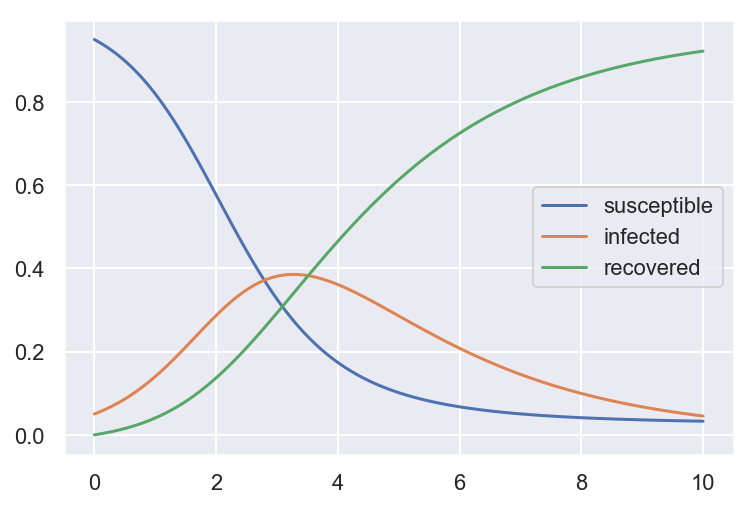

In [42]:
import scipy.integrate as spi
tout = np.linspace(0, 10, 100)
k_vals = 1.66, 0.4545455
y0 = [0.95, 0.05, 0]
yout = spi.odeint(rhs, y0, tout, k_vals)
plt.plot(tout, yout)
plt.legend(['susceptible', 'infected', 'recovered']);

We will construct the system from a symbolic representation. But at the same time, we need the ``rhs`` function to be fast. Which means that we want to produce a fast function from our symbolic representation. Generating a function from our symbolic representation is achieved through *code generation*. 

1. Construct a symbolic representation from some domain specific representation using SymPy.
2. Have SymPy generate a function with an appropriate signature (or multiple thereof), which we pass on to the solver.

We will achieve (1) by using SymPy symbols (and functions if needed). For (2) we will use a function in SymPy called ``lambdify``―it takes a symbolic expressions and returns a function. In a later notebook, we will look at (1), for now we will just use ``rhs`` which we've already written:

In [43]:
y, k = sym.symbols('y:3'), sym.symbols('beta gamma')
ydot = rhs(y, None, *k)
y, ydot

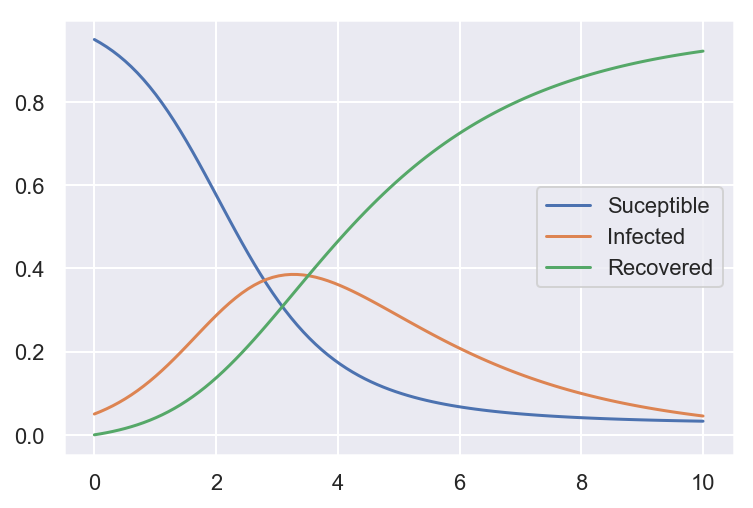

In [44]:
f = sym.lambdify((y,t)+k, ydot)
plt.plot(tout, spi.odeint(f, y0, tout, k_vals))
plt.legend(['Suceptible', 'Infected', 'Recovered']);

In this example the gains of using a symbolic representation are arguably limited.

Let's take the same example with demography and $n$ classes of subjects:

$$
X_i = S_i, I_i, R_i  \qquad i = 1 \ldots n 
$$

$$
    \frac{dS_i}{dt} = \nu_i - \beta_i S_i I_i - \mu_i S_i + 
    \sum_{j=1}^n m_{ji} S_j-\sum_{j=1}^n m_{ij} S_i \\
    \frac{dI_i}{dt} = \beta_i S_i I_i - (\gamma_i + \mu_i) I_i +
    \sum_{j=1}^n m_{ij} I_j-\sum_{j=1}^n m_{ji} I_i \\
    \frac{dR_i}{dt} = - \frac{dS_i}{dt} - \frac{dI_i}{dt}
$$

- $\beta$  : transmission coefficient
- $\gamma$ : healing rate
- $\mu$    : mortality rate
- $\nu$    : birth rate
        

### Exercise 

- Create the symbolic matrix $m$, symbols $\nu_i,\mu_i,\beta_i,\gamma_i$ for $i=0,1,2$ and $y_j$ for
$j=0,1,2,\ldots,8$
- Write the system $\dot{y} = f(t,y,m,\nu,\mu,\beta,\gamma)$
- `lambdify` the $f$ function.
- Solve the system with:
$$
m = \begin{bmatrix} 
0 & 0.01 & 0.01 \\
0.01 & 0 & 0.01 \\
0.01 & 0.01 & 0 \\
\end{bmatrix}
$$
$$
\begin{aligned}
t &= [0,10] \mbox{ with } dt = 0.1 \\
\nu_i &= 0.0 \\
\mu_i &= 0.0 \\
\beta_i &= 1.66 \\
\gamma_i &= [0.4545,0.3545,0.2545] \\
S_i&= 0.95 \\
I_i &= 0.05 \\
R_i &= 0.0 
\end{aligned}
$$


### Exercise : Bezier curve

We want to compute and the draw the Bezier curve between the 3 points $p_0$, $p_1$, and $p_2$,
The middle point $p_1$ position is arbitrary.

$$
p0=(1,0); \qquad
p1=(x,y); \qquad
p2=(0,1)
$$


The $n+1$ Bernstein basis polynomials of degree $n$ are defined as

$$
b_{i,n}(x) = {n \choose i} x^{i} \left( 1 - x \right)^{n - i}, \quad i = 0, \ldots, n.
$$

where ${n \choose i}$ is the binomial coefficient.

The Bezier curve is defined by a linear combination of Bernstein basis polynomials:

$$B_n(x) = \sum_{i=0}^{n} \beta_{i} b_{i,n}(x)$$

- With`sympy.binomial`, write a function `bpoly(t,n,i)` that returns the Bernstein basis polynomial $b_{i,n}(t)$.
- Compute the Berstein polynomial representing the Bezier curve between $p_0,p_1,p_2$. $\beta_i=1$.
- Plot the Bezier Curve for 3 positions of $p_1= (0,0), (0.5,0.5), (1,1)$ 


## Integrals quadrature

In [45]:
from sympy.integrals.quadrature import *
x, w = gauss_legendre(3, 5)
x, w

In [46]:
x, w = gauss_lobatto(3,12)
x, w

# References

- [SciPy 2017 tutorial](https://youtu.be/5jzIVp6bTy0)

